In [1]:
import os
import sys
import cv2
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
# Import library
# Appending the findpeaks package folder
sys.path.append("./denoise/")
import findpeaks

(-0.5, 511.5, 511.5, -0.5)

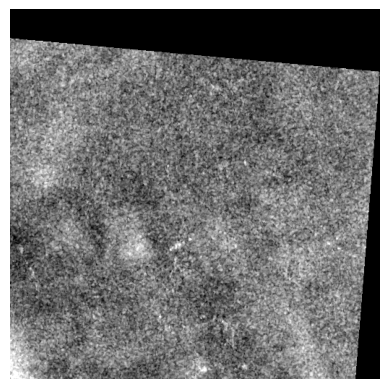

In [2]:
# Initializatie
fp = findpeaks.findpeaks(scale=None, denoise=None, togray=False, imsize=(512, 512))
img = cv2.imread("./gris/Pakitsoq for Denoise/_hoff_1_15_1_0.png",0)
plt.imshow(img,cmap = plt.cm.gray);plt.axis('off')

In [3]:
# # filters parameters
# # denoising window size, increasing window size may remove noise better in some cases
# winsize = 3
# # damping factor for lee enhanced
# k = 1.0
# # coefficient of variation of noise
# cu_value = 0.25
# # noise coefficient of variation for lee enhanced
# cu = 0.523
# # max coefficient of variation for lee enhanced
# cmax = 1.73

[findpeaks] >Denoising with [fastnl], window: [13].


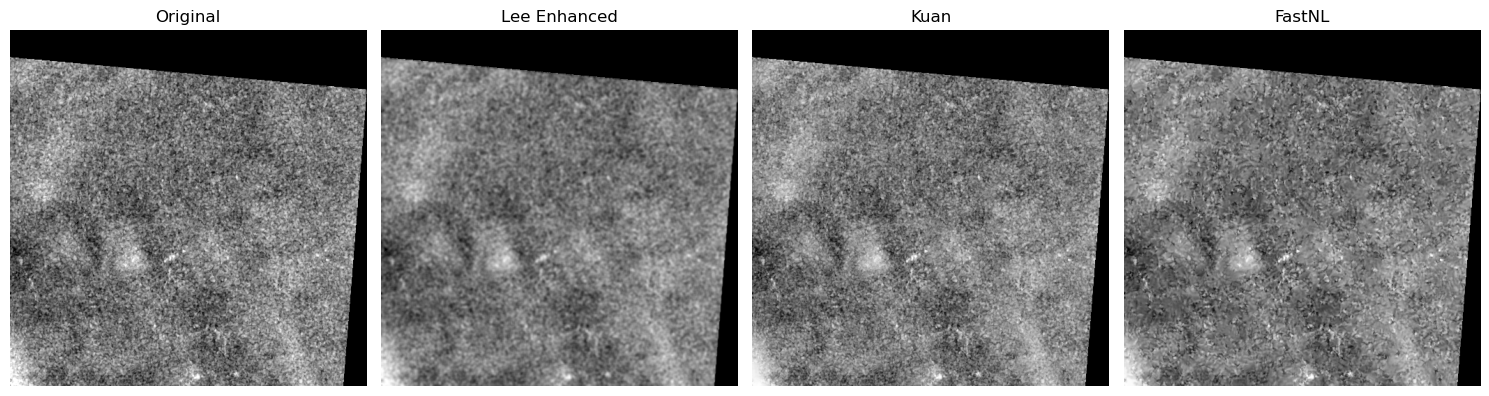

In [11]:
# lee enhanced filter
image_lee_enhanced = findpeaks.lee_enhanced_filter(img, win_size=5, cmax = 1.5, cu = 0.5, k = 1.0)
# kuan filter
image_kuan = findpeaks.kuan_filter(img, win_size=15, cu=0.09)
# fastnl
img_fastnl = findpeaks.stats.denoise(img, method='fastnl', window=13, cu = 0.3)
# Plot
fig, ax = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(15,15))
ax[0].imshow(img, cmap = plt.cm.gray); ax[0].set_title('Original'); ax[0].axis('off')
ax[1].imshow(image_lee_enhanced, cmap = plt.cm.gray); ax[1].set_title('Lee Enhanced'); ax[1].axis('off')
ax[2].imshow(image_kuan,cmap=plt.cm.gray); ax[2].set_title('Kuan'); ax[2].axis('off')
ax[3].imshow(img_fastnl,cmap=plt.cm.gray); ax[3].set_title('FastNL'); ax[3].axis('off')
plt.tight_layout()

In [35]:
edges = cv2.Canny(image=image_kuan, threshold1 = 200, threshold2 = 300)
# Plot
plt.imshow(edges, cmap = plt.cm.gray);plt.axis('off')

error: OpenCV(4.6.0) C:\b\abs_d8ltn27ay8\croot\opencv-suite_1676452046667\work\modules\imgproc\src\canny.cpp:829: error: (-215:Assertion failed) _src.depth() == CV_8U in function 'cv::Canny'


In [ ]:
from PIL import Image
output_directory = "./output_images/"
##Iterate over the dataset and predictions
for i, (image) in enumerate(Pakitsoq_2021.take(24)):
    prediction_image = np.argmax(Nov13_T15_43_43_prediction_2021[i, ...], axis=-1)
    # Convert to 8-bit image
    prediction_image = prediction_image.astype(np.uint8)
    # Save each prediction image separately
    img = Image.fromarray(prediction_image, mode='L')  # 'L' mode for 8-bit images (grayscale)
    img.save(os.path.join(output_directory, 'Pakitsoq_2021_{}.png'.format(i + 1)), format="PNG")

(-0.5, 511.5, 511.5, -0.5)

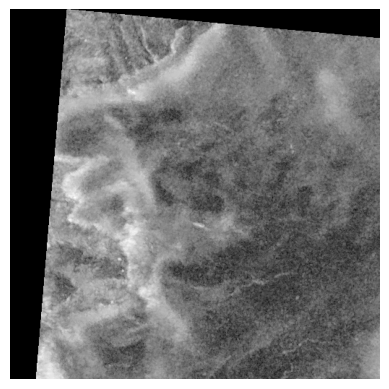

In [7]:
# kuan filter
image_kuan = findpeaks.kuan_filter(img, win_size=17, cu=0.05)
# Plot
plt.imshow(image_kuan, cmap = plt.cm.gray);plt.axis('off')

[findpeaks] >Denoising with [fastnl], window: [7].


(-0.5, 511.5, 511.5, -0.5)

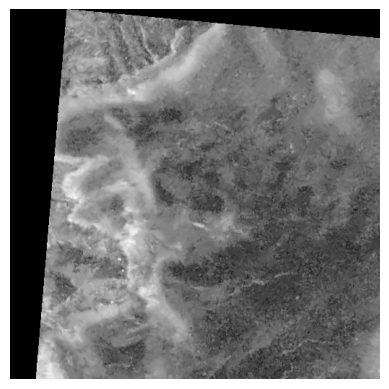

In [21]:
# fastnl
img_fastnl = findpeaks.stats.denoise(img, method='fastnl', window=7)

# Plot
plt.imshow(img_fastnl, cmap = plt.cm.gray);plt.axis('off')

In [ ]:
from PIL import Image
output_directory = "./output_images/"
##Iterate over the dataset and predictions
for i, (image) in enumerate(Pakitsoq_2021.take(24)):
    prediction_image = np.argmax(Nov13_T15_43_43_prediction_2021[i, ...], axis=-1)
    # Convert to 8-bit image
    prediction_image = prediction_image.astype(np.uint8)
    # Save each prediction image separately
    img = Image.fromarray(prediction_image, mode='L')  # 'L' mode for 8-bit images (grayscale)
    img.save(os.path.join(output_directory, 'Pakitsoq_2021_{}.png'.format(i + 1)), format="PNG")

In [ ]:
from PIL import Image
##Iterate over the dataset and predictions
for i, (image) in enumerate(Pakitsoq_2021.take(24)):
    prediction_image = np.argmax(Nov13_T15_43_43_prediction_2021[i, ...], axis=-1)
    # Convert to 8-bit image
    prediction_image = prediction_image.astype(np.uint8)
    ## counting the number of pixels 
    #number_of_bg_pix = np.sum(prediction_image == 0) 
    number_of_crevasse_pix = np.sum(prediction_image == 1) 
    #number_of_stream_pix = np.sum(prediction_image == 2)
    #print('Number of black pixels:', number_of_bg_pix)
    print(number_of_crevasse_pix)
    #print('Number of stream/lake pixels:', number_of_stream_pix)
    # Save each prediction image separately
    img = Image.fromarray(prediction_image, mode='L')  # 'L' mode for 8-bit images (grayscale)
    img.save(os.path.join(output_directory, 'Pakitsoq_2021_{}.png'.format(i + 1)), format="PNG")